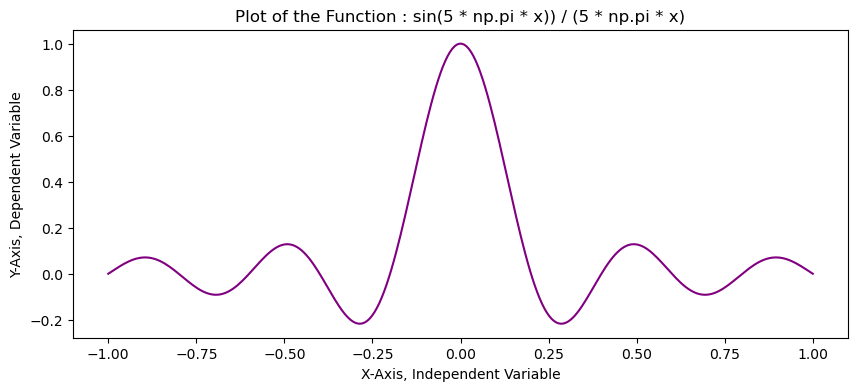

X-shape is : torch.Size([300, 1])
Y-shape is : torch.Size([300, 1])


In [1]:
# Importing necessary libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

# Setting a seed for reproducibility
torch.manual_seed(1)

# Creating data
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)  # 300 points between -1 and 1
y = (np.sin(5 * np.pi * x)) / (5 * np.pi * x)  # Applying the function

# Plotting the data
plt.figure(figsize=(10, 4))
plt.plot(x.numpy(), y.numpy(), color="purple")
plt.title('Plot of the Function : sin(5 * np.pi * x)) / (5 * np.pi * x)')
plt.xlabel('X-Axis, Independent Variable')
plt.ylabel('Y-Axis, Dependent Variable')
plt.show()

# Print shapes of x and y
print('X-shape is :', x.shape)
print('Y-shape is :', y.shape)

# Getting the shape of the input
n_samples, n_features = x.shape

In [2]:
def training_function(model, x, y):
    def train_step(model, x, y):
        model.train()
        optimizer.zero_grad()
        prediction = model(x)
        loss = loss_func(prediction, y)
        loss.backward()
        optimizer.step() 
        return loss.item(), prediction

    def check_convergence(loss_arr, tolerance=1.0e-05):
        if len(loss_arr) > 3:
            if abs(loss_arr[-3] - loss_arr[-2]) < tolerance and abs(loss_arr[-2] - loss_arr[-1]) < tolerance:
                return True
        return False

    # Main training loop
    max_epoch = 20000
    epoch_arr, loss_arr = [], []
    epoch, not_converged = 0, True

    while not_converged:
        epoch += 1
        loss, prediction = train_step(model, x, y)

        epoch_arr.append(epoch)
        loss_arr.append(loss)

        if epoch % 100 == 0:
            print(f'epoch: {epoch}, loss: {loss:.4f}', end='\r', flush=True)

        if epoch >= max_epoch:
            print("Maximum Epoch Reached")
            not_converged = False
        elif loss < 0.001 and check_convergence(loss_arr):
            print(f"Convergence reached for loss: {loss:.4f} at epoch: {epoch}")
            not_converged = False

    return epoch_arr, loss_arr, prediction

In [3]:
# Function to count total parameters in a model
def parameter_count(model):
    def get_total_parameters(model):
        return sum(p.numel() for p in model.parameters())

    total_parameters = get_total_parameters(model)
    print(f'Total number of parameters in the model: {total_parameters}')

# Function to display model weights and biases
def model_weight(model, before_training=True, model_number=1):
    def display_parameters(model, stage):
        for name, param in model.named_parameters():
            print(f'{name}: {param.data}')

    stage = "before" if before_training else "after"
    print(f"\nModel {model_number} weights and biases {stage} training:\n")
    display_parameters(model, stage)

In [4]:
import torch.nn as nn

class CNNModel_Zero(nn.Module):
    def __init__(self):
        super(CNNModel_Zero, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear(10, 10)
        self.hidden4 = torch.nn.Linear(10, 10)
        self.hidden5 = torch.nn.Linear(10, 10)
        self.hidden6 = torch.nn.Linear(10, 10)
        self.hidden7 = torch.nn.Linear(10, 5)
        self.predict = torch.nn.Linear(5, 1)

        self.leaky_relu = torch.nn.LeakyReLU()


    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))
        x = self.leaky_relu(self.hidden2(x))
        x = self.leaky_relu(self.hidden3(x))
        x = self.leaky_relu(self.hidden4(x))
        x = self.leaky_relu(self.hidden5(x))
        x = self.leaky_relu(self.hidden6(x))
        x = self.leaky_relu(self.hidden7(x))
        x = self.predict(x)
        return x

In [5]:
class CNNModel_One(nn.Module):
    def __init__(self):
        super(CNNModel_One, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)
        self.hidden2 = torch.nn.Linear(10, 18)
        self.hidden3 = torch.nn.Linear(18, 15)
        self.hidden4 = torch.nn.Linear(15, 4)
        self.predict = torch.nn.Linear(4, 1)

        self.leaky_relu = torch.nn.LeakyReLU()


    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))
        x = self.leaky_relu(self.hidden2(x))
        x = self.leaky_relu(self.hidden3(x))
        x = self.leaky_relu(self.hidden4(x))
        x = self.predict(x)
        return x

In [6]:
class CNNModel_Two(nn.Module):
    def __init__(self):
        super(CNNModel_Two, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)
        self.predict = torch.nn.Linear(190, 1)

        self.leaky_relu = torch.nn.LeakyReLU()


    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))
        x = self.predict(x)
        return x

In [7]:
import torch.optim as optim
# Instantiate models and optimizers
model_0 = CNNModel_Zero()
model_1 = CNNModel_One()
model_2 = CNNModel_Two()

In [8]:
#Counting parameters for each model
parameter_count(model_0)
parameter_count(model_1)
parameter_count(model_2)

Total number of parameters in the model: 571
Total number of parameters in the model: 572
Total number of parameters in the model: 571


In [9]:
#Calculating weight of each model
model_weight(model_0, before_training=True, model_number=0)
model_weight(model_1, before_training=True, model_number=1)
model_weight(model_2, before_training=True, model_number=2)


Model 0 weights and biases before training:

hidden1.weight: tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias: tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight: tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias: tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
hidden3.weight: tensor([[ 0.1720, -0.0742,  0.1545,  0.0180,  0.1038,  0.0695,  0.1150

In [10]:
#Calculating weight of each model
model_weight(model_0, before_training=False, model_number=0)
model_weight(model_1, before_training=False, model_number=1)
model_weight(model_2, before_training=False, model_number=2)


Model 0 weights and biases after training:

hidden1.weight: tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias: tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight: tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias: tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
hidden3.weight: tensor([[ 0.1720, -0.0742,  0.1545,  0.0180,  0.1038,  0.0695,  0.1150,

In [11]:
optimizer = optim.Adam(model_0.parameters(), lr=0.001)
loss_func = nn.MSELoss()

print("model_0")
model0epoch_arr,model0loss_arr,model0_prediction = training_function(model_0,x,y)

model_0
Convergence reached for loss: 0.0010 at epoch: 9526


In [12]:
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
loss_func = nn.MSELoss()

print("model_1")
model1epoch_arr,model1loss_arr,model1_prediction = training_function(model_1,x,y)


model_1
Convergence reached for loss: 0.0009 at epoch: 2430


In [13]:
optimizer = optim.Adam(model_2.parameters(), lr=0.001)
loss_func = nn.MSELoss()

print("model_2")
model2epoch_arr,model2loss_arr,model2_prediction = training_function(model_2,x,y)

model_2
Convergence reached for loss: 0.0010 at epoch: 1582


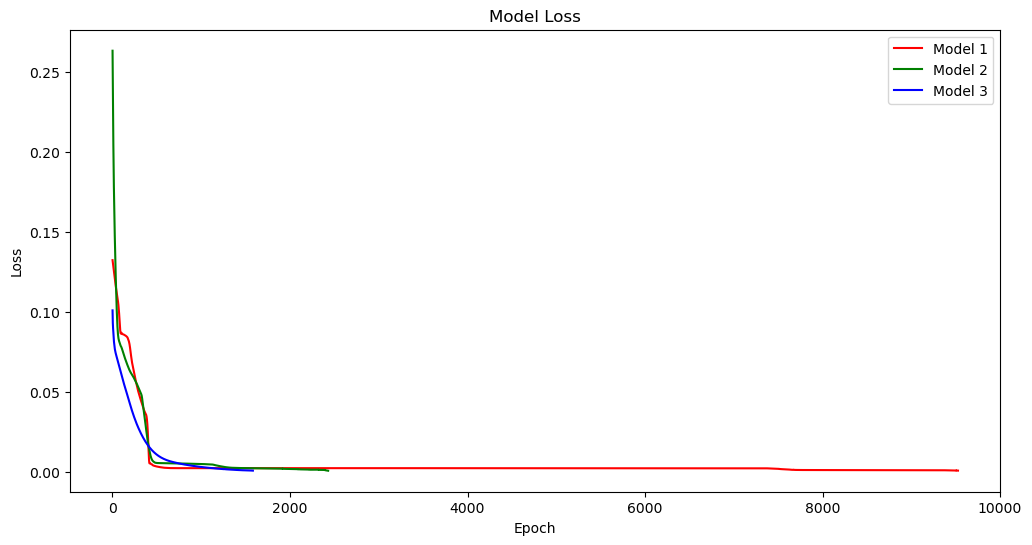

In [14]:
# Plotting the loss
plt.figure(figsize=(12,6))
plt.plot(model0epoch_arr, model0loss_arr, color = "r")
plt.plot(model1epoch_arr, model1loss_arr, color = "g")
plt.plot(model2epoch_arr, model2loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

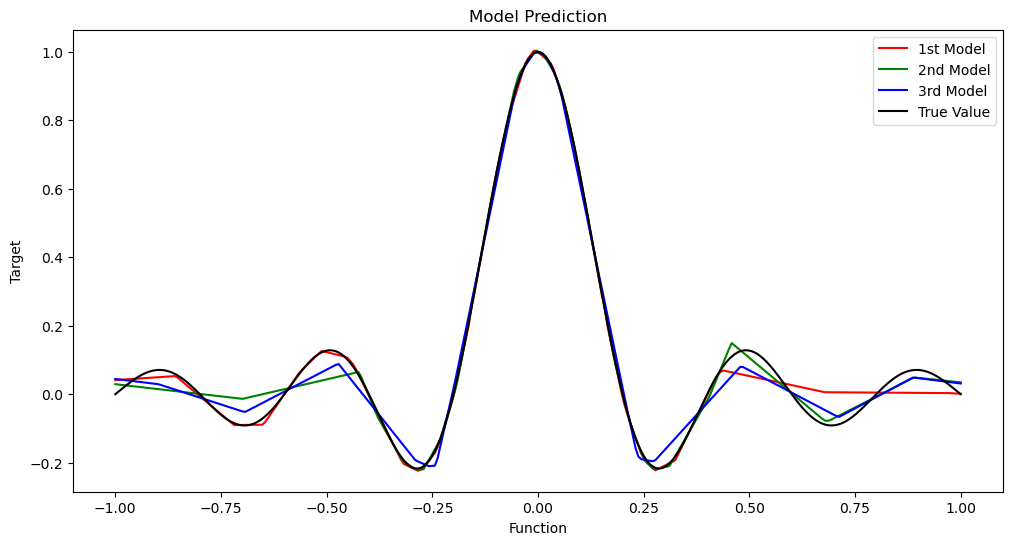

In [15]:
plt.figure(figsize=(12,6))
plt.plot(x, model0_prediction.data, color="r", label = '1st Model')
plt.plot(x, model1_prediction.data, color="g", label = '2nd Model')
plt.plot(x, model2_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()

For Function 2, sin(5 * np.pi * x_data)

In [16]:
# Set random seed
torch.manual_seed(42)

# Data preparation
x_data = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y_data = np.sign(np.sin(5 * np.pi * x_data))
x_data, y_data = torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_data, dtype=torch.float32)


/local_scratch/slurm.711896/ipykernel_1667342/3303821457.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_data, y_data = torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_data, dtype=torch.float32)


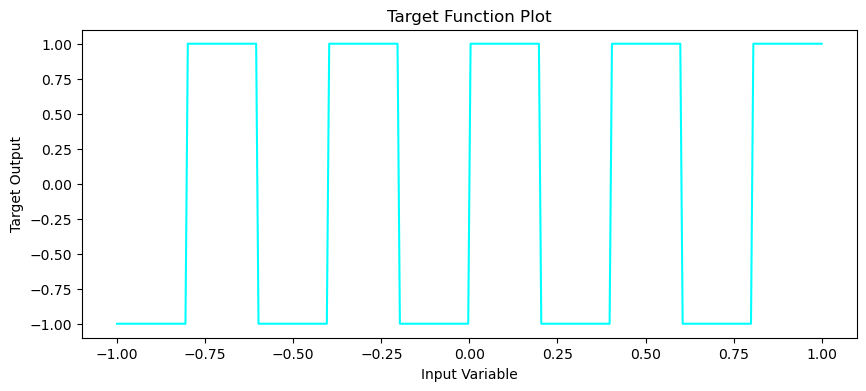

In [17]:
# Plotting the target function
plt.figure(figsize=(10,4))
plt.plot(x_data, y_data, color='cyan')
plt.title('Target Function Plot')
plt.xlabel('Input Variable')
plt.ylabel('Target Output')
plt.savefig('target_function.png')
plt.show()

In [18]:
# Number of samples and features
samples, features = x_data.shape

# Training function for the neural network models
def fit_model(net,x_data,y_data):
    net.train()
    max_epochs = 25000
    epoch_log,loss_log = [],[]
    convergence_reached = False
    iteration = 0

    while not convergence_reached:
        iteration += 1
        pred_output = net(x_data)
        error = loss_fn(pred_output, y_data)
        opt.zero_grad()
        error.backward()
        opt.step()

        epoch_log.append(iteration)
        loss_log.append(error.detach().numpy())

        if iteration % 100 == 0:
            print(f'Epoch: {iteration}, Loss: {error.item():.4f}', end='\r', flush=True)

        if iteration == max_epochs:
            print("Max Epoch Limit Reached")
            convergence_reached = True
        elif iteration > 5 and loss_log[-1] < 0.001:
            if abs(loss_log[-3] - loss_log[-2]) < 1.0e-05 and abs(loss_log[-2] - loss_log[-1]) < 1.0e-05:
                print(f"Convergence Achieved with Loss: {loss_log[-1]:.4f} at Epoch: {iteration}")
                convergence_reached = True

    return epoch_log, loss_log, pred_output

In [19]:
# Function to count total number of parameters in the model
def count_parameters(net,idx):
    total_params = [torch.numel(p) for p in net.parameters()]
    print('Model {} contains {} parameters'.format(idx, np.sum(total_params)))

# Function to display model weights
def display_weights(net,before_train=True,idx=0):
    if before_train:
        print(f"\nModel {idx} weights and bias before training:\n")
    else:
        print(f"\nModel {idx} weights and bias after training:\n")
    for param in net.state_dict():
        print(param, "\t", net.state_dict()[param])


In [20]:
# Model 1 architecture
class NetworkA(torch.nn.Module):
    def __init__(self):
        super(NetworkA, self).__init__()
        self.layer1 = torch.nn.Linear(1, 5)
        self.layer2 = torch.nn.Linear(5, 10)
        self.layer3 = torch.nn.Linear(10, 10)
        self.layer4 = torch.nn.Linear(10, 10)
        self.layer5 = torch.nn.Linear(10, 10)
        self.layer6 = torch.nn.Linear(10, 10)
        self.layer7 = torch.nn.Linear(10, 5)
        self.output = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.layer1(x))
        x = torch.nn.functional.leaky_relu(self.layer2(x))
        x = torch.nn.functional.leaky_relu(self.layer3(x))
        x = torch.nn.functional.leaky_relu(self.layer4(x))
        x = torch.nn.functional.leaky_relu(self.layer5(x))
        x = torch.nn.functional.leaky_relu(self.layer6(x))
        x = torch.nn.functional.leaky_relu(self.layer7(x))
        x = self.output(x)
        return x

# Model 2 architecture
class NetworkB(torch.nn.Module):
    def __init__(self):
        super(NetworkB, self).__init__()
        self.layer1 = torch.nn.Linear(1, 10)
        self.layer2 = torch.nn.Linear(10, 18)
        self.layer3 = torch.nn.Linear(18, 15)
        self.layer4 = torch.nn.Linear(15, 4)
        self.output = torch.nn.Linear(4, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.layer1(x))
        x = torch.nn.functional.leaky_relu(self.layer2(x))
        x = torch.nn.functional.leaky_relu(self.layer3(x))
        x = torch.nn.functional.leaky_relu(self.layer4(x))
        x = self.output(x)
        return x

# Model 3 architecture
class NetworkC(torch.nn.Module):
    def __init__(self):
        super(NetworkC, self).__init__()
        self.layer1 = torch.nn.Linear(1, 190)
        self.output = torch.nn.Linear(190, 1)

    def forward(self, x):
        x = torch.nn.functional.leaky_relu(self.layer1(x))
        x = self.output(x)
        return x

In [21]:
# Training model 1
model_1 = NetworkA()
opt = torch.optim.Adam(model_1.parameters(), lr=0.0012, weight_decay=1e-4)
loss_fn = torch.nn.MSELoss()
count_parameters(model_1, 1)
display_weights(model_1, True, 1)
epochs_m1, loss_m1, predictions_m1 = fit_model(model_1, x_data, y_data)
display_weights(model_1, False, 1)

Model 1 contains 571 parameters

Model 1 weights and bias before training:

layer1.weight 	 tensor([[ 0.7645],
        [ 0.8300],
        [-0.2343],
        [ 0.9186],
        [-0.2191]])
layer1.bias 	 tensor([ 0.2018, -0.4869,  0.5873,  0.8815, -0.7336])
layer2.weight 	 tensor([[ 0.3887,  0.0837,  0.3304,  0.0606,  0.2156],
        [-0.0631,  0.3448,  0.0661, -0.2088,  0.1140],
        [-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
        [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
        [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
        [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410],
        [ 0.1202, -0.1213,  0.1882,  0.3993,  0.2585],
        [-0.1955,  0.2582,  0.0800,  0.2271, -0.2726],
        [-0.4427, -0.1728, -0.3430,  0.3670,  0.1288],
        [ 0.1852,  0.1414, -0.0078,  0.3500, -0.3178]])
layer2.bias 	 tensor([ 0.0282, -0.3052,  0.1379, -0.1540,  0.1370, -0.0932,  0.3709, -0.2651,
        -0.2667, -0.2667])
layer3.weight 	 tensor([[ 0.2844,  0.1054,  0.3043, -0.2

In [26]:
# Training model 2
model_2 = NetworkB()
opt = torch.optim.Adam(model_2.parameters(), lr=0.0012, weight_decay=1e-4)
count_parameters(model_2, 2)
display_weights(model_2, True, 2)
epochs_m2, loss_m2, predictions_m2 = fit_model(model_2, x_data, y_data)
display_weights(model_2, False, 2)

Model 2 contains 572 parameters

Model 2 weights and bias before training:

layer1.weight 	 tensor([[ 0.6983],
        [-0.6788],
        [ 0.1987],
        [-0.2238],
        [ 0.6428],
        [-0.4491],
        [ 0.0701],
        [ 0.5983],
        [-0.9161],
        [-0.8444]])
layer1.bias 	 tensor([-0.5122,  0.6414,  0.6705, -0.6830,  0.1907, -0.5299, -0.4642,  0.8624,
         0.4830, -0.2735])
layer2.weight 	 tensor([[ 0.0465,  0.0613,  0.0741, -0.1082, -0.1862,  0.2094,  0.0425,  0.1324,
         -0.1198,  0.1532],
        [ 0.2301,  0.1923,  0.0860,  0.3111, -0.0007,  0.0673,  0.3005,  0.3073,
         -0.1335,  0.2849],
        [ 0.1167, -0.0354,  0.2761, -0.1638,  0.2055,  0.3134, -0.2181, -0.1866,
         -0.3134, -0.0569],
        [-0.2872, -0.1059,  0.0960,  0.2235,  0.1761,  0.1755,  0.1312, -0.1961,
         -0.2511,  0.0131],
        [ 0.3003,  0.0178, -0.0272, -0.2146, -0.1568, -0.2438,  0.2532, -0.0515,
         -0.2794,  0.0339],
        [ 0.0229, -0.0391,  0.1132,

In [27]:
# Training model 3
model_3 = NetworkC()
opt = torch.optim.Adam(model_3.parameters(), lr=0.0011, weight_decay=1e-4)
count_parameters(model_3, 3)
display_weights(model_3, True, 3)
epochs_m3, loss_m3, predictions_m3 = fit_model(model_3, x_data, y_data)
display_weights(model_3, False, 3)

Model 3 contains 571 parameters

Model 3 weights and bias before training:

layer1.weight 	 tensor([[ 0.6548],
        [-0.3796],
        [-0.2815],
        [ 0.7619],
        [ 0.8586],
        [-0.1147],
        [-0.7179],
        [-0.5017],
        [ 0.1273],
        [ 0.5862],
        [ 0.4978],
        [-0.4416],
        [-0.9454],
        [-0.8751],
        [-0.3182],
        [ 0.0125],
        [-0.4492],
        [-0.7907],
        [ 0.1054],
        [-0.7937],
        [-0.7679],
        [-0.8129],
        [-0.2710],
        [ 0.8833],
        [ 0.3909],
        [-0.1186],
        [ 0.2058],
        [ 0.3982],
        [ 0.0058],
        [-0.8066],
        [-0.6161],
        [-0.6794],
        [-0.0254],
        [-0.9154],
        [-0.1818],
        [-0.3657],
        [ 0.9814],
        [ 0.8128],
        [ 0.5809],
        [ 0.0561],
        [-0.3238],
        [ 0.2551],
        [-0.6909],
        [-0.4265],
        [-0.2009],
        [-0.2350],
        [-0.9473],
        [ 0.397

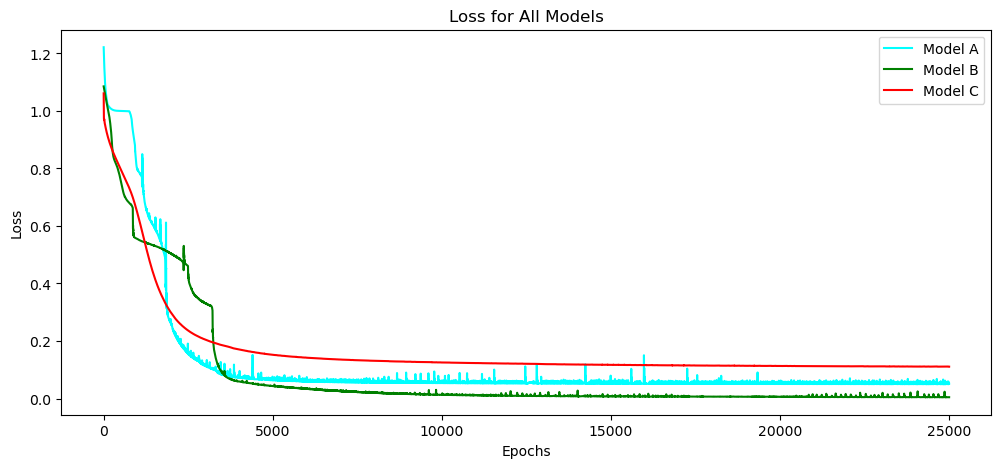

In [28]:
# Combined loss plot for all models
plt.figure(figsize=(12,5))
plt.plot(epochs_m1, loss_m1, color="cyan")
plt.plot(epochs_m2, loss_m2, color="green")
plt.plot(epochs_m3, loss_m3, color="red")
plt.title('Loss for All Models')
plt.legend(['Model A', 'Model B', 'Model C'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('combined_loss.pdf')
plt.show()

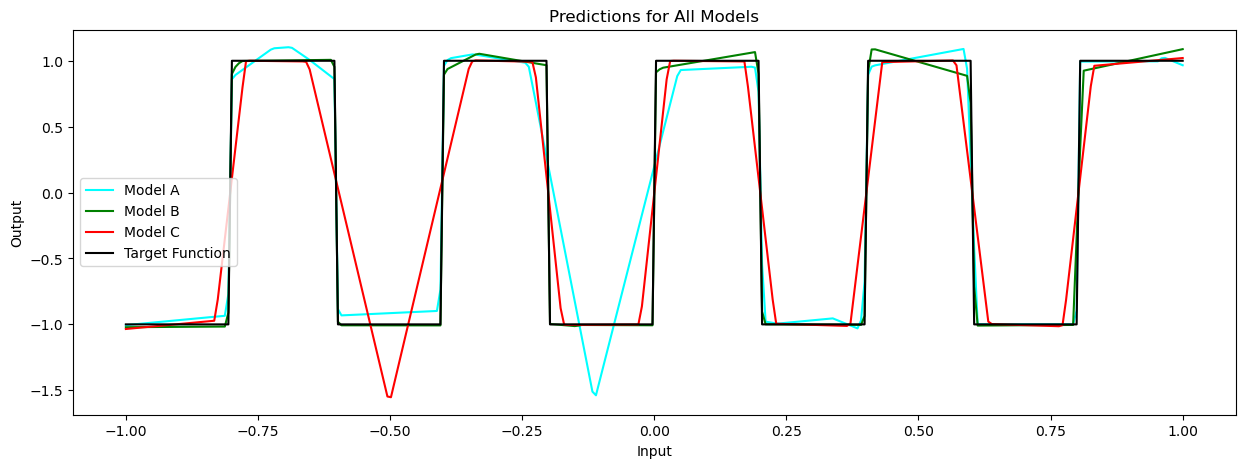

In [29]:
# Combined prediction plot for all models
plt.figure(figsize=(15,5))
plt.plot(x_data, predictions_m1.data.numpy(), color="cyan")
plt.plot(x_data, predictions_m2.data.numpy(), color="green")
plt.plot(x_data, predictions_m3.data.numpy(), color="red")
plt.plot(x_data, y_data.numpy(), color="black")
plt.title('Predictions for All Models')
plt.legend(['Model A', 'Model B', 'Model C', 'Target Function'], loc='best')
plt.xlabel('Input')
plt.ylabel('Output')
plt.savefig('combined_predictions.pdf')
plt.show()